In [106]:
import matplotlib.pyplot as plt

from scripts import tabular_baselines

import seaborn as sns
import numpy as np

from datasets import load_openml_list, valid_dids_classification, test_dids_classification, open_cc_dids
from scripts.tabular_baselines import knn_metric, catboost_metric, transformer_metric, logistic_metric, xgb_metric, random_forest_metric, mlp_metric
from scripts.tabular_evaluation import evaluate
from scripts.tabular_metrics import calculate_score, make_ranks_and_wins_table, make_metric_matrix
from scripts import tabular_metrics
from scripts.transformer_prediction_interface import TabPFNClassifier

In [2]:
from notebook_utils import *

In [107]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Datasets

In [108]:
from datasets import load_openml_list, open_cc_dids, open_cc_valid_dids, test_dids_classification

cc_test_datasets_multiclass, cc_test_datasets_multiclass_df = load_openml_list(open_cc_dids, multiclass=True, shuffled=True, filter_for_nan=False, max_samples = 10000, num_feats=100, return_capped=True)


Number of datasets: 30


# Setting params

In [110]:
import os
eval_positions = [1000]
max_features = 100
bptt = 2000
base_path = os.path.join('.')
overwrite = False
metric_used = tabular_metrics.auc_metric
task_type = 'multiclass'

# Baseline Evaluation
This section runs baselines and saves results locally.

In [111]:
!mkdir -p {base_path}/results
!mkdir -p {base_path}/results/tabular/
!mkdir -p {base_path}/results/tabular/multiclass/

/bin/bash: /anaconda/envs/fresh311/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /anaconda/envs/fresh311/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /anaconda/envs/fresh311/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [112]:
# transformers don't have max times
max_times = [1]

In [113]:
cc_test_datasets_multiclass_df['isNumeric'] = (cc_test_datasets_multiclass_df.NumberOfSymbolicFeatures == 1) & (cc_test_datasets_multiclass_df.NumberOfInstancesWithMissingValues == 0)
name_indexed_dataset = cc_test_datasets_multiclass_df.set_index("name")

numeric_test_datasets = [ds for ds in cc_test_datasets_multiclass if name_indexed_dataset.loc[ds[0]].isNumeric]
len(numeric_test_datasets)

18

In [114]:
import os
os.environ["LD_LIBRARY_PATH"] = "/anaconda/envs/fresh311/lib:" + os.environ["LD_LIBRARY_PATH"]

In [224]:
from tabpfn.scripts.tabular_evaluation import eval_on_datasets
device = "cpu"
max_times = [1, 5, 15, 60, 5 * 60, 15 * 60, 60 * 60]
clf_dict= {
    'knn': knn_metric,
    'rf_new_params': random_forest_metric,
    'xgb': xgb_metric,
    'logistic': logistic_metric,
    'mlp': mlp_metric}

results_baselines = [
    eval_on_datasets('multiclass', model, model_name, numeric_test_datasets, eval_positions=eval_positions, max_times=max_times,
                     metric_used=metric_used, split_numbers=[1, 2, 3, 4, 5],
                     bptt=bptt, base_path=base_path, device=device)
    for model_name, model in clf_dict.items()
]

model_name  knn


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  2.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.


model_name  rf_new_params


[Parallel(n_jobs=-1)]: Done 179 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 439 out of 630 | elapsed:    0.6s remaining:    0.2s


model_name  xgb


[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed: 45.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:   16.3s


model_name  logistic


[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed: 63.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 439 out of 630 | elapsed:    1.4s remaining:    0.6s


model_name  mlp


[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed: 48.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed: 63.8min finished
Bad pipe message: %s [b'\xfcpb\\c\xb1\x8f)\xe4\xb8\xa7v\xdc\x8a\xc5\xa2\x1d\xd2 \xdd@l\xb1\xa9C\xdc\x8aZ\xcdj8\x03\xfa\xd9\x8d/T\xad&>\x03\x82A\xc7\xe3\xe3.0\r\xa3\x03\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r']
Bad pipe message: %s [b"l\x8c\x06\xea\xb4\x06Fw\xd9/\x85\xc9-8_\x02\xd6\x89 (\x8a\x04\x88'\xda\n.]{\xc2l\x0b\xb3`\xef\xf1LCe"]
Bad pipe message: %s [b'\xdeE\x9c\xe8\x07\x11z1"\xe4\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\

In [63]:
from tabpfn.scripts.tabular_evaluation import eval_on_datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scripts.distill_mlp import DistilledTabPFNMLP
from tabpfn.transformer_make_model import PermutationsMeta, ForwardMLPModel
from functools import partial

# transformers don't have max times
import warnings
max_times = [1]
device = "cuda"

model_string = "defaults_k_aggregate_2_batch_128_onehot_classes_multiclass_02_10_2023_23_55_16"
tabpfn_mine =  TabPFNClassifier(device=device, model_string=model_string, epoch=82, N_ensemble_configurations=32)
distilled_tabpfn = DistilledTabPFNMLP(n_epochs=1000, device="cuda", hidden_size=128, n_layers=2, dropout_rate=.1, learning_rate=0.01, model_string=model_string, epoch=82, )
mother_model_string = "models_diff/prior_diff_real_checkpointcontinue_hidden_128_embed_dim_1024_decoder_nhid_2048_nlayer12_lr0003_n_0_epoch_65.cpkt"
forward_mlp = PermutationsMeta(ForwardMLPModel(path=mother_model_string))
mothernet_gpu_inference = PermutationsMeta(ForwardMLPModel(path=mother_model_string, device="cuda", inference_device="cuda"))
mothernet_no_permutations = ForwardMLPModel(path=mother_model_string)
distilled_tabpfn_scaled = make_pipeline(StandardScaler(), distilled_tabpfn)

clf_dict= {
    
             'transformer': transformer_metric,
               'transformer_mine': partial(transformer_metric, classifier=tabpfn_mine),
                'distill_tabpfn_scaled':  partial(transformer_metric, classifier=distilled_tabpfn_scaled),
                'mother_net': partial(transformer_metric, classifier=forward_mlp),
                'mothernet_no_permutations': partial(transformer_metric, classifier=mothernet_no_permutations),
                'mothernet_gpu_inference': partial(transformer_metric, classifier=mothernet_gpu_inference)
                  }
results_transformers = [
    eval_on_datasets('multiclass', model, model_name, numeric_test_datasets, eval_positions=eval_positions, max_times=max_times,
                     metric_used=metric_used, split_numbers=[1, 2, 3, 4, 5],
                     bptt=bptt, base_path=base_path, device=device, overwrite=False)
    for model_name, model in clf_dict.items()
]

model_name  transformer


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 103.05it/s]


model_name  transformer_mine


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 117.46it/s]


model_name  distill_tabpfn_scaled


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 119.83it/s]


model_name  mother_net


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 118.28it/s]


model_name  mothernet_no_permutations


  0%|                                                                                                                                                                                                                                                                                                                                                              | 0/90 [00:00<?, ?it/s]

predicted hidden layer size  128


  1%|███▊                                                                                                                                                                                                                                                                                                                                                  | 1/90 [00:01<01:50,  1.25s/it]

decoder output layer size  66954


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:14<00:00,  6.33it/s]


model_name  mothernet_gpu_inference


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90/90 [00:07<00:00, 12.59it/s]


In [225]:
flat_results = []
for per_dataset in results_baselines + results_transformers:
    for result in per_dataset:
        row = {}
        for key in ['dataset', 'model', 'mean_metric', 'split', 'max_time']:
            row[key] = result[key]
        best_configs_key, = [k for k in result.keys() if "best_configs" in k]
        if result[best_configs_key][0] is not None:
            row.update(result[best_configs_key][0])
        row['mean_metric'] = row["mean_metric"].numpy()
        flat_results.append(row)

results_df = pd.DataFrame(flat_results)
results_df['mean_metric'] = results_df['mean_metric'].astype(float)

In [226]:
results_df.to_csv("results_test_set_baseline_new_baseline_4_new_rf_gpu_times_hour.csv")

In [227]:
import pickle
with open("results_test_set_distilled_scaled_times_new_rf_gpu_times_mlp_hour.pickle", "wb") as f:
    pickle.dump( results_baselines + results_transformers, f)

In [228]:
results_df.model.unique()


array(['knn', 'rf_new_params', 'xgb', 'logistic', 'mlp', 'transformer',
       'transformer_mine', 'distill_tabpfn_scaled', 'mother_net',
       'mothernet_no_permutations', 'mothernet_gpu_inference'],
      dtype=object)

In [229]:
mean_over_splits = results_df.groupby(["dataset", "model", "max_time"])[["mean_metric", "fit_time", "inference_time"]].mean().reset_index()

In [230]:
best_tuned = mean_over_splits[mean_over_splits.max_time == 900]
untuned = mean_over_splits[~mean_over_splits.model.isin(best_tuned.model.unique())]

In [231]:
combined_best = pd.concat([best_tuned, untuned])

In [232]:
combined_best

,dataset,model,max_time,mean_metric,fit_time,inference_time
6,analcatdata_authorship,knn,900,0.999763,0.000303,0.003355
13,analcatdata_authorship,logistic,900,0.999965,0.111798,0.000254
20,analcatdata_authorship,mlp,900,0.999924,3.230070,0.002234
30,analcatdata_authorship,rf_new_params,900,0.999574,0.157641,0.024691
39,analcatdata_authorship,xgb,900,0.999928,8.946292,0.042689
...,...,...,...,...,...,...
719,wdbc,mother_net,1,0.995587,0.099954,0.034809
720,wdbc,mothernet_gpu_inference,1,0.995587,0.020013,0.001559
721,wdbc,mothernet_no_permutations,1,0.995389,0.083563,0.001453
729,wdbc,transformer,1,0.996465,0.000688,1.796201


/tmp/ipykernel_1767046/2767538477.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_tuning.fit_and_predict_time[with_tuning.model == "XGBoost"] = with_tuning.fit_and_predict_time[with_tuning.model == "XGBoost"] + 300
/tmp/ipykernel_1767046/2767538477.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_tuning.fit_and_predict_time[with_tuning.model == "MLP"] = with_tuning.fit_and_predict_time[with_tuning.model == "MLP"] + 300
/tmp/ipykernel_1767046/2767538477.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

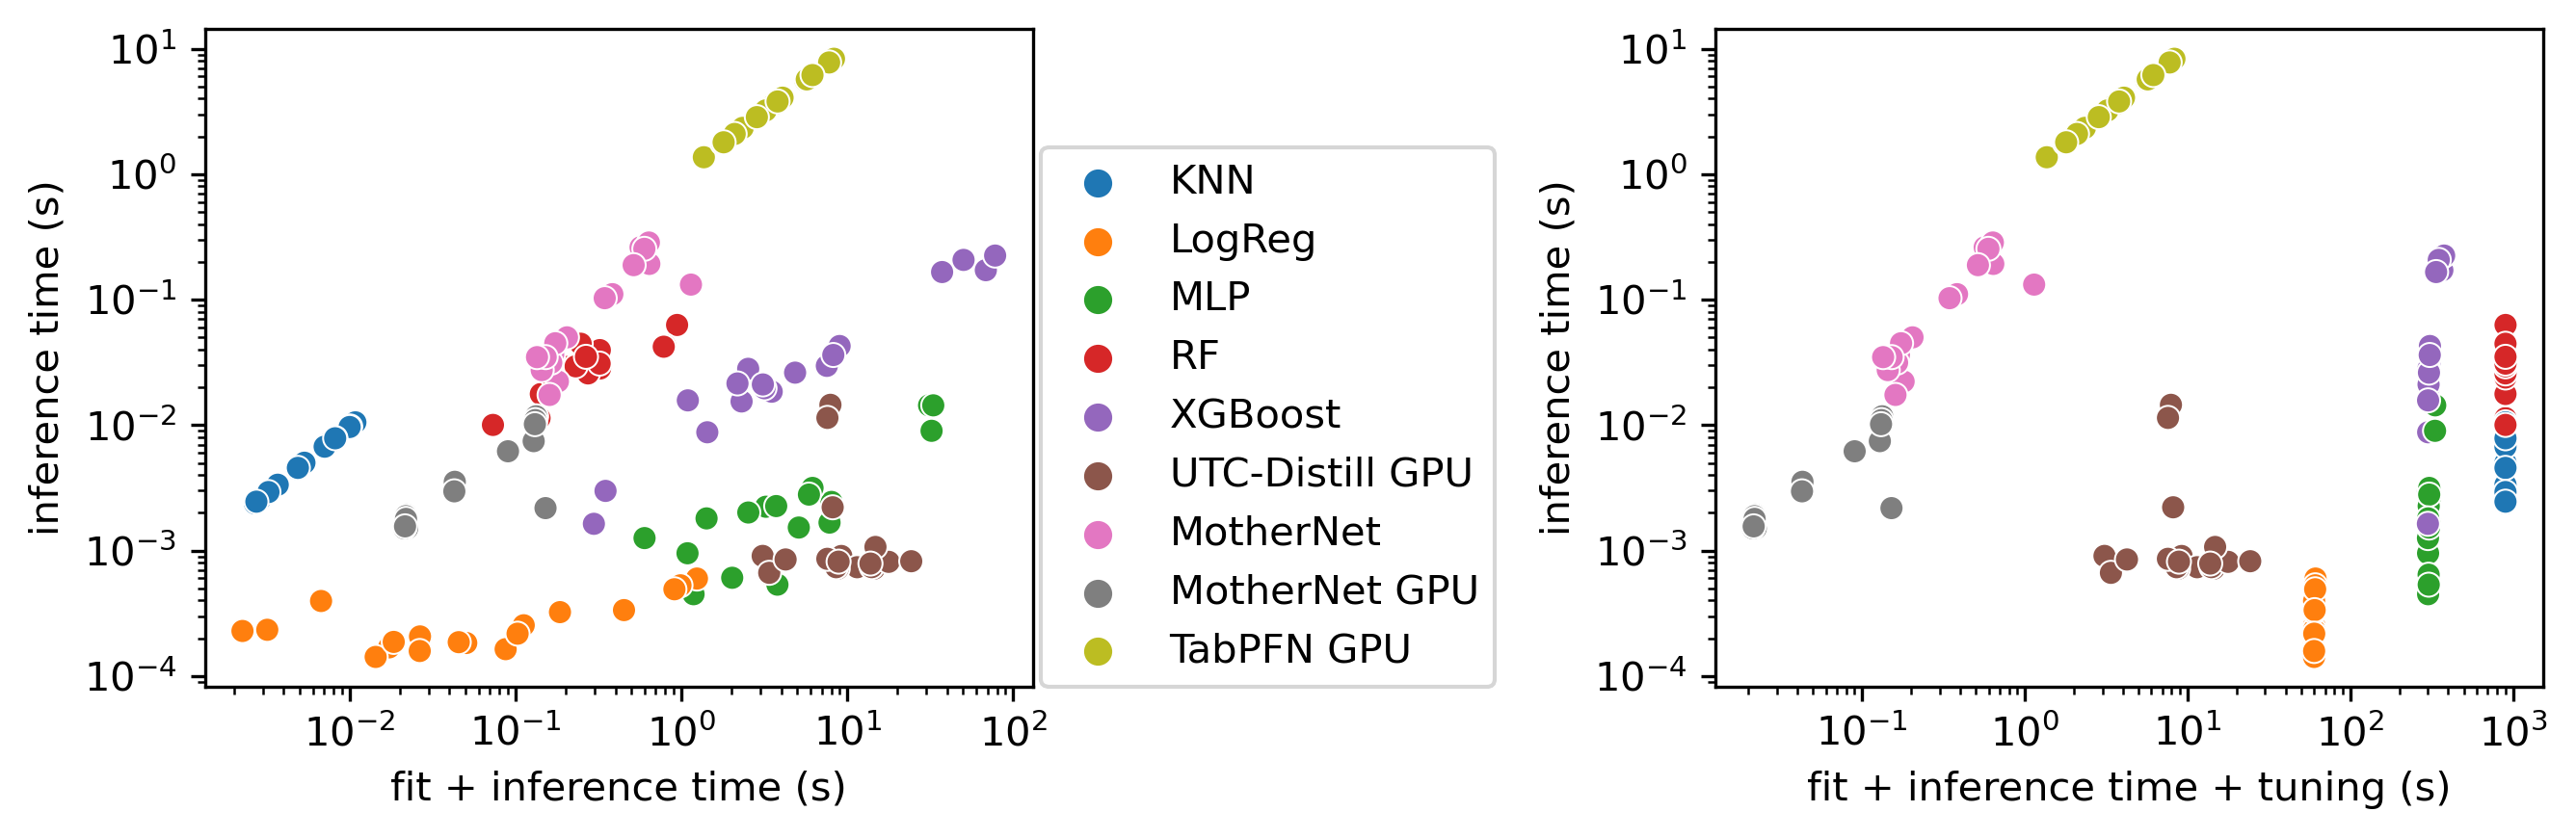

In [233]:
combined_best = combined_best[~combined_best.model.isin(["mothernet_no_permutations", "transformer_mine"])].copy()
combined_best['model'] = combined_best.model.replace({'knn': "KNN", 'rf': 'RF', 'rf_new_params': 'RF','mother_net': 'MotherNet', 'mothernet_gpu_inference': 'MotherNet GPU', 'mlp': "MLP", 'mothernet_no_permutations': 'MothernetNP', 'transformer': 'TabPFN GPU', 'distill_tabpfn_scaled': 'UTC-Distill GPU', 'xgb':'XGBoost', 'logistic': 'LogReg', 'TabPFN-distill':'UTC-Distill'})

fig, axes = plt.subplots(1, 2, figsize=(9, 3), dpi=300)
# sns.scatterplot(data=combined_best, y="inference_time", x="fit_time", hue="model", ax=axes[0])
# axes[0].set_xscale("log")
# axes[0].set_yscale("log")
# axes[0].set_xlabel("fit time (s)")
# axes[0].set_ylabel("inference time (s)")
# axes[0].legend().remove()

combined_best['fit_and_predict_time'] = combined_best['fit_time'] + combined_best['inference_time']

#sns.scatterplot(data=combined_best, y="inference_time", x="fit_and_predict_time", hue="model", ax=axes[0], hue_order=["MotherNet", "TabPFN GPU", 'TabPFN-distill GPU', 'XGBoost', 'MotherNet GPU', "KNN", "LogReg", "RF", "MLP"])
sns.scatterplot(data=combined_best, y="inference_time", x="fit_and_predict_time", hue="model", ax=axes[0])
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_xlabel("fit + inference time (s)")
axes[0].set_ylabel("inference time (s)")
legend = axes[0].legend()
sns.move_legend(axes[0], (1.01, 0))

with_tuning = combined_best.copy()
#with_tuning = with_tuning[with_tuning.model.isin(["MotherNet", "TabPFN GPU", 'TabPFN-distill GPU', 'XGBoost', 'MotherNet GPU'])]
with_tuning.fit_and_predict_time[with_tuning.model == "XGBoost"] = with_tuning.fit_and_predict_time[with_tuning.model == "XGBoost"] + 300
with_tuning.fit_and_predict_time[with_tuning.model == "MLP"] = with_tuning.fit_and_predict_time[with_tuning.model == "MLP"] + 300
with_tuning.fit_and_predict_time[with_tuning.model == "KNN"] = with_tuning.fit_and_predict_time[with_tuning.model == "KNN"] + 900
with_tuning.fit_and_predict_time[with_tuning.model == "RF"] = with_tuning.fit_and_predict_time[with_tuning.model == "RF"] + 900
with_tuning.fit_and_predict_time[with_tuning.model == "LogReg"] = with_tuning.fit_and_predict_time[with_tuning.model == "LogReg"] + 60



#sns.scatterplot(data=with_tuning, y="inference_time", x="fit_and_predict_time", hue="model", ax=axes[1], hue_order=["MotherNet", "TabPFN GPU", 'TabPFN-distill GPU', 'XGBoost', 'MotherNet GPU'])
sns.scatterplot(data=with_tuning, y="inference_time", x="fit_and_predict_time", hue="model", ax=axes[1])
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_xlabel("fit + inference time + tuning (s)")
axes[1].set_ylabel("inference time (s)")

axes[1].legend().remove()
plt.tight_layout()
plt.savefig("timing_comparison_GPU_two_panels_gpu_mlp_utc.pdf")


In [234]:
results_df.model.unique()

array(['knn', 'rf_new_params', 'xgb', 'logistic', 'mlp', 'transformer',
       'transformer_mine', 'distill_tabpfn_scaled', 'mother_net',
       'mothernet_no_permutations', 'mothernet_gpu_inference'],
      dtype=object)

In [235]:
results_df_filtered = results_df[~results_df.model.isin(["transformer_mine", "mothernet_no_permutations", "mothernet_gpu_inference"])]

In [236]:
results_df_filtered['model'] = results_df_filtered.model.replace({'knn': "KNN", 'mlp': "MLP", 'rf_new_params': 'RF', 'mother_net': 'MotherNet', 'transformer': 'TabPFN', 'TabPFN-distill': 'UTC-Distill','distill_tabpfn_scaled': 'UTC-Distill', 'xgb':'XGBoost', 'logistic': 'LogReg'})
results_df_filtered.model.unique()

/tmp/ipykernel_1767046/3162842160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_filtered['model'] = results_df_filtered.model.replace({'knn': "KNN", 'mlp': "MLP", 'rf_new_params': 'RF', 'mother_net': 'MotherNet', 'transformer': 'TabPFN', 'TabPFN-distill': 'UTC-Distill','distill_tabpfn_scaled': 'UTC-Distill', 'xgb':'XGBoost', 'logistic': 'LogReg'})


array(['KNN', 'RF', 'XGBoost', 'LogReg', 'MLP', 'TabPFN', 'UTC-Distill',
       'MotherNet'], dtype=object)

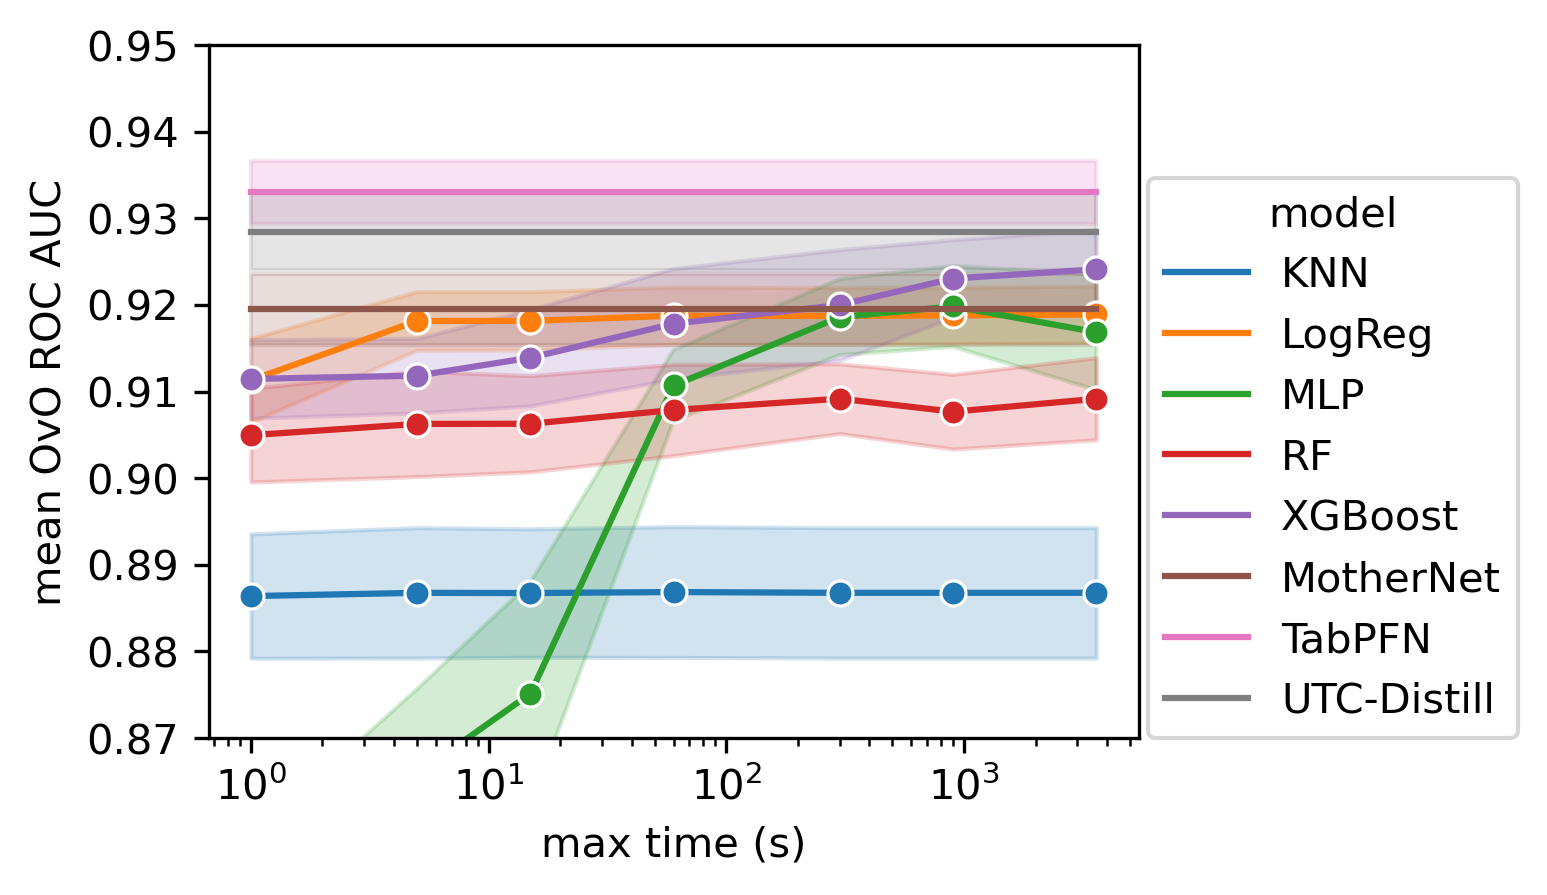

In [244]:
plt.figure(figsize=(4, 3), dpi=300)

compare_splits = results_df_filtered.groupby(["model", "split", "max_time"])['mean_metric'].mean().reset_index()

import seaborn as sns
varies_over_time = ['LogReg', 'XGBoost', 'RF', 'KNN', "MLP"]
compare_splits_varies = compare_splits[compare_splits.model.isin(varies_over_time)]
compare_splits_fixed = compare_splits[~compare_splits.model.isin(varies_over_time)]

color_palette = sns.color_palette()
ax = sns.lineplot(compare_splits_varies, x="max_time", y="mean_metric", hue="model", errorbar="sd", marker="o", palette=color_palette[:len(varies_over_time)])

compare_splits_fixed_dummy = compare_splits_fixed.copy()
compare_splits_fixed_dummy['max_time'] = compare_splits_varies.max_time.max()
sns.lineplot(pd.concat([compare_splits_fixed, compare_splits_fixed_dummy]),
             x="max_time", y="mean_metric", hue="model", errorbar="sd", ax=ax, palette=color_palette[len(varies_over_time):compare_splits.model.nunique()])
sns.move_legend(ax, (1.01, 0))
ax.set_ylabel("mean OvO ROC AUC")
ax.set_xlabel("max time (s)")
ax.set_xscale("log")
ax.set_ylim(0.87, 0.95)
legend = ax.get_legend()
#legend.remove()

plt.savefig("mean_auc_over_time_test_numeric_no_legend_mlp_utc_big_font.pdf", bbox_inches="tight")

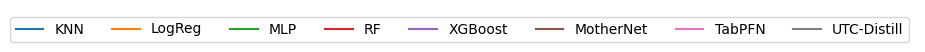

In [241]:
plt.figure(figsize=(10, .2))
ax = plt.gca()
ax.legend(legend.legend_handles, [t.get_text() for t in legend.texts], ncols=8)
ax.set_axis_off()
plt.savefig("legend_mlp_utc.pdf", bbox_inches="tight")

In [246]:
average_over_splits = results_df_filtered.groupby(["dataset", "model", "max_time"]).mean_metric.mean().reset_index()

In [247]:
best_over_time = average_over_splits.groupby(["dataset", "model"]).mean_metric.max().reset_index()
best_over_time

,dataset,model,mean_metric
0,analcatdata_authorship,KNN,0.999763
1,analcatdata_authorship,LogReg,0.999965
2,analcatdata_authorship,MLP,0.999936
3,analcatdata_authorship,MotherNet,0.999966
4,analcatdata_authorship,RF,0.999788
...,...,...,...
139,wdbc,MotherNet,0.995587
140,wdbc,RF,0.992082
141,wdbc,TabPFN,0.996465
142,wdbc,UTC-Distill,0.994704


/anaconda/envs/fresh311/lib/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


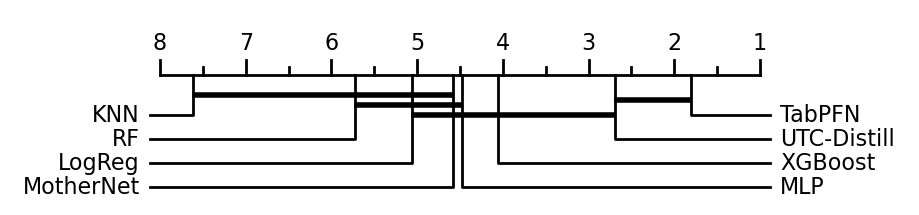

In [248]:
from tabpfn.scripts.critical_differences import draw_cd_diagram

best_over_time.columns = ['dataset_name', 'classifier_name', 'accuracy']
res = draw_cd_diagram(best_over_time, title="OVO ROC AUC");
plt.savefig("cd_diagram_test_set_numeric_mlp_utc.pdf", bbox_inches="tight", pad_inches=.15)

# Rank over Time

In [249]:
results_for_ranking = results_df_filtered.pivot(index="max_time", columns=["dataset", "split", "model"], values="mean_metric").ffill()

ranks_per_split_per_dataset = results_for_ranking.stack("model").unstack("max_time").rank(ascending=False)
average_ranks = ranks_per_split_per_dataset.stack("dataset").unstack("model").mean().reset_index(name="mean_rank")
average_ranks

,split,max_time,model,mean_rank
0,1,1,KNN,6.500000
1,1,1,LogReg,4.916667
2,1,1,MLP,6.611111
3,1,1,MotherNet,4.194444
4,1,1,RF,5.111111
...,...,...,...,...
275,5,3600,MotherNet,4.555556
276,5,3600,RF,5.722222
277,5,3600,TabPFN,1.833333
278,5,3600,UTC-Distill,2.944444


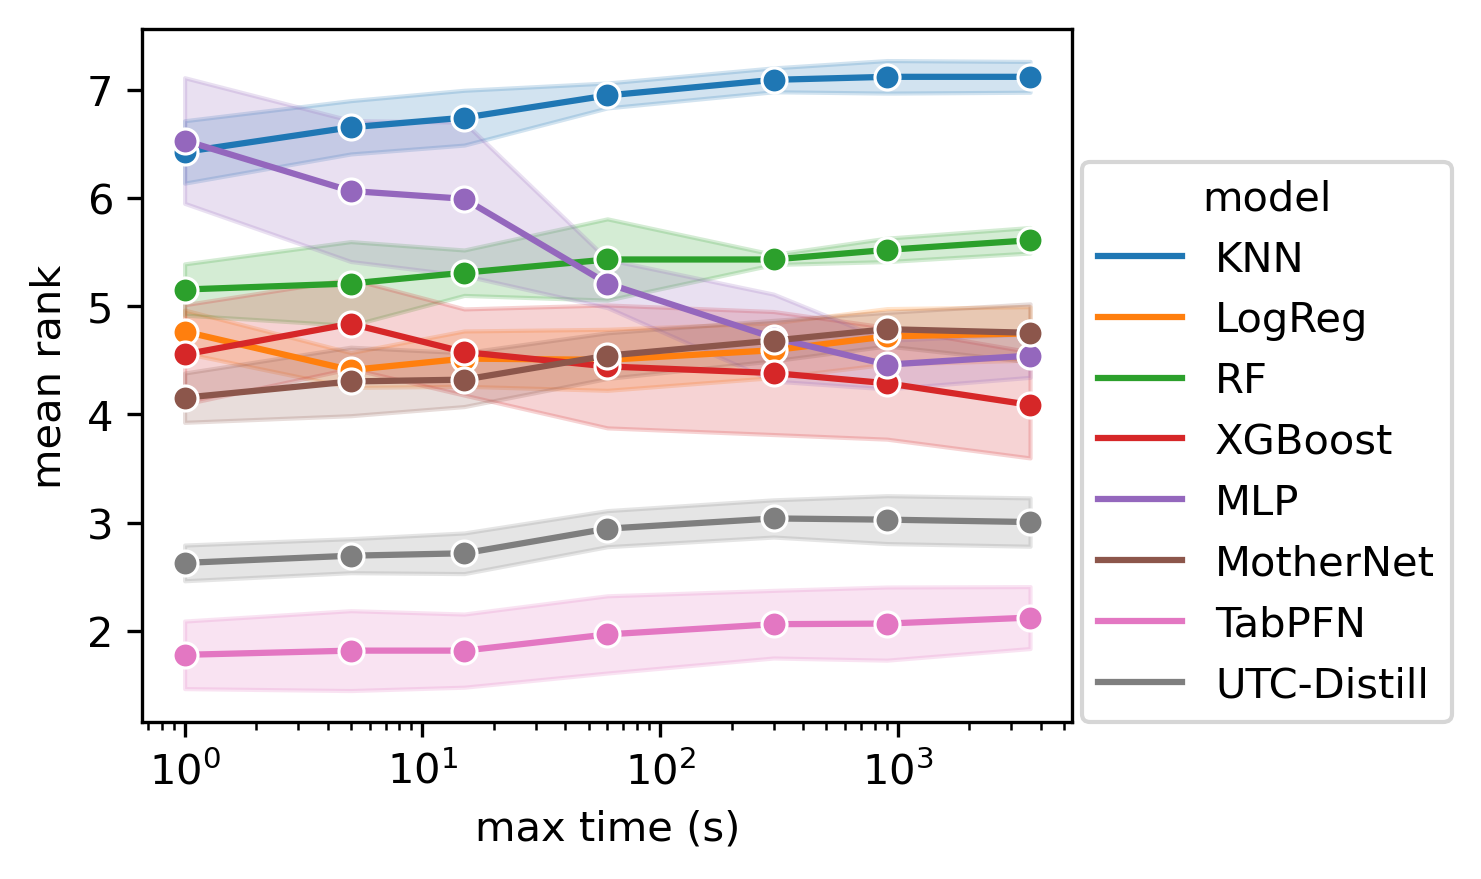

In [257]:
plt.figure(figsize=(4, 3), dpi=300)

ax = sns.lineplot(average_ranks, x="max_time", y="mean_rank", hue="model", errorbar="sd", marker="o", hue_order=['KNN', 'LogReg', 'RF', 'XGBoost', 'MLP', 'MotherNet', 'TabPFN', 'UTC-Distill'])
ax.set_xscale("log")
sns.move_legend(ax, (1.01, 0))
ax.set_ylabel("mean rank")
ax.set_xlabel("max time (s)")
#ax.get_legend().remove()

plt.savefig("rank_over_time_test_numeric_no_legend_mlp_big_font_hour.pdf", bbox_inches="tight")

In [157]:
debugging = results_for_ranking.loc[900].groupby(["model", "dataset"]).mean().unstack("model")

In [158]:
debugging

model,KNN,LogReg,MotherNet,RF,TabPFN,TabPFN-distill,XGBoost
dataset,,,,,,,
analcatdata_authorship,0.999763,0.999965,0.999966,0.999690,0.999988,0.999960,0.999928
balance-scale,0.885090,0.961910,0.990334,0.829424,0.996911,0.993046,0.979806
banknote-authentication,0.999211,0.999728,1.000000,0.999700,1.000000,1.000000,0.999986
blood-transfusion-service-center,0.708473,0.749737,0.761208,0.707496,0.756096,0.745235,0.721660
climate-model-simulation-crashes,0.848553,0.932231,0.942667,0.848155,0.942607,0.908443,0.928573
diabetes,0.805992,0.839508,0.842668,0.825504,0.840872,0.842393,0.839657
kc2,0.782070,0.826276,0.829753,0.828284,0.834560,0.833576,0.823913
mfeat-fourier,0.970107,0.976802,0.959880,0.980629,0.980081,0.981114,0.978362
mfeat-karhunen,0.993779,0.995534,0.989189,0.996394,0.997788,0.997916,0.997819


In [162]:
cc_test_datasets_multiclass_df

,did,name,version,uploader,status,format,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures,isNumeric
11,11,balance-scale,1,1,active,ARFF,288.0,3.0,49.0,3.0,5.0,625.0,0.0,0.0,4.0,1.0,True
14,14,mfeat-fourier,1,1,active,ARFF,200.0,10.0,200.0,10.0,77.0,2000.0,0.0,0.0,76.0,1.0,True
15,15,breast-w,1,1,active,ARFF,458.0,2.0,241.0,2.0,10.0,699.0,16.0,16.0,9.0,1.0,False
16,16,mfeat-karhunen,1,1,active,ARFF,200.0,10.0,200.0,10.0,65.0,2000.0,0.0,0.0,64.0,1.0,True
18,18,mfeat-morphological,1,1,active,ARFF,200.0,10.0,200.0,10.0,7.0,2000.0,0.0,0.0,6.0,1.0,True
22,22,mfeat-zernike,1,1,active,ARFF,200.0,10.0,200.0,10.0,48.0,2000.0,0.0,0.0,47.0,1.0,True
23,23,cmc,1,1,active,ARFF,629.0,4.0,333.0,3.0,10.0,1473.0,0.0,0.0,2.0,8.0,False
29,29,credit-approval,1,1,active,ARFF,383.0,14.0,307.0,2.0,16.0,690.0,37.0,67.0,6.0,10.0,False
31,31,credit-g,1,1,active,ARFF,700.0,10.0,300.0,2.0,21.0,1000.0,0.0,0.0,7.0,14.0,False
37,37,diabetes,1,1,active,ARFF,500.0,2.0,268.0,2.0,9.0,768.0,0.0,0.0,8.0,1.0,True


In [164]:
debugging.merge(cc_test_datasets_multiclass_df, right_on="name", left_index=True)

,KNN,LogReg,MotherNet,RF,TabPFN,TabPFN-distill,XGBoost,did,name,version,...,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures,isNumeric
458,0.999763,0.999965,0.999966,0.999690,0.999988,0.999960,0.999928,458,analcatdata_authorship,1,...,4.0,55.0,4.0,71.0,841.0,0.0,0.0,70.0,1.0,True
11,0.885090,0.961910,0.990334,0.829424,0.996911,0.993046,0.979806,11,balance-scale,1,...,3.0,49.0,3.0,5.0,625.0,0.0,0.0,4.0,1.0,True
1462,0.999211,0.999728,1.000000,0.999700,1.000000,1.000000,0.999986,1462,banknote-authentication,1,...,2.0,610.0,2.0,5.0,1372.0,0.0,0.0,4.0,1.0,True
1464,0.708473,0.749737,0.761208,0.707496,0.756096,0.745235,0.721660,1464,blood-transfusion-service-center,1,...,2.0,178.0,2.0,5.0,748.0,0.0,0.0,4.0,1.0,True
40994,0.848553,0.932231,0.942667,0.848155,0.942607,0.908443,0.928573,40994,climate-model-simulation-crashes,4,...,2.0,46.0,2.0,21.0,540.0,0.0,0.0,20.0,1.0,True
37,0.805992,0.839508,0.842668,0.825504,0.840872,0.842393,0.839657,37,diabetes,1,...,2.0,268.0,2.0,9.0,768.0,0.0,0.0,8.0,1.0,True
1063,0.782070,0.826276,0.829753,0.828284,0.834560,0.833576,0.823913,1063,kc2,1,...,2.0,107.0,2.0,22.0,522.0,0.0,0.0,21.0,1.0,True
14,0.970107,0.976802,0.959880,0.980629,0.980081,0.981114,0.978362,14,mfeat-fourier,1,...,10.0,200.0,10.0,77.0,2000.0,0.0,0.0,76.0,1.0,True
16,0.993779,0.995534,0.989189,0.996394,0.997788,0.997916,0.997819,16,mfeat-karhunen,1,...,10.0,200.0,10.0,65.0,2000.0,0.0,0.0,64.0,1.0,True
18,0.950986,0.965620,0.953030,0.959992,0.965225,0.967101,0.959615,18,mfeat-morphological,1,...,10.0,200.0,10.0,7.0,2000.0,0.0,0.0,6.0,1.0,True


In [258]:
small_datasets = cc_test_datasets_multiclass_df[cc_test_datasets_multiclass_df.NumberOfInstances < 1000].name.tolist()

In [259]:
results_combined_small_data = results_df_filtered[results_df_filtered.dataset.isin(small_datasets)]

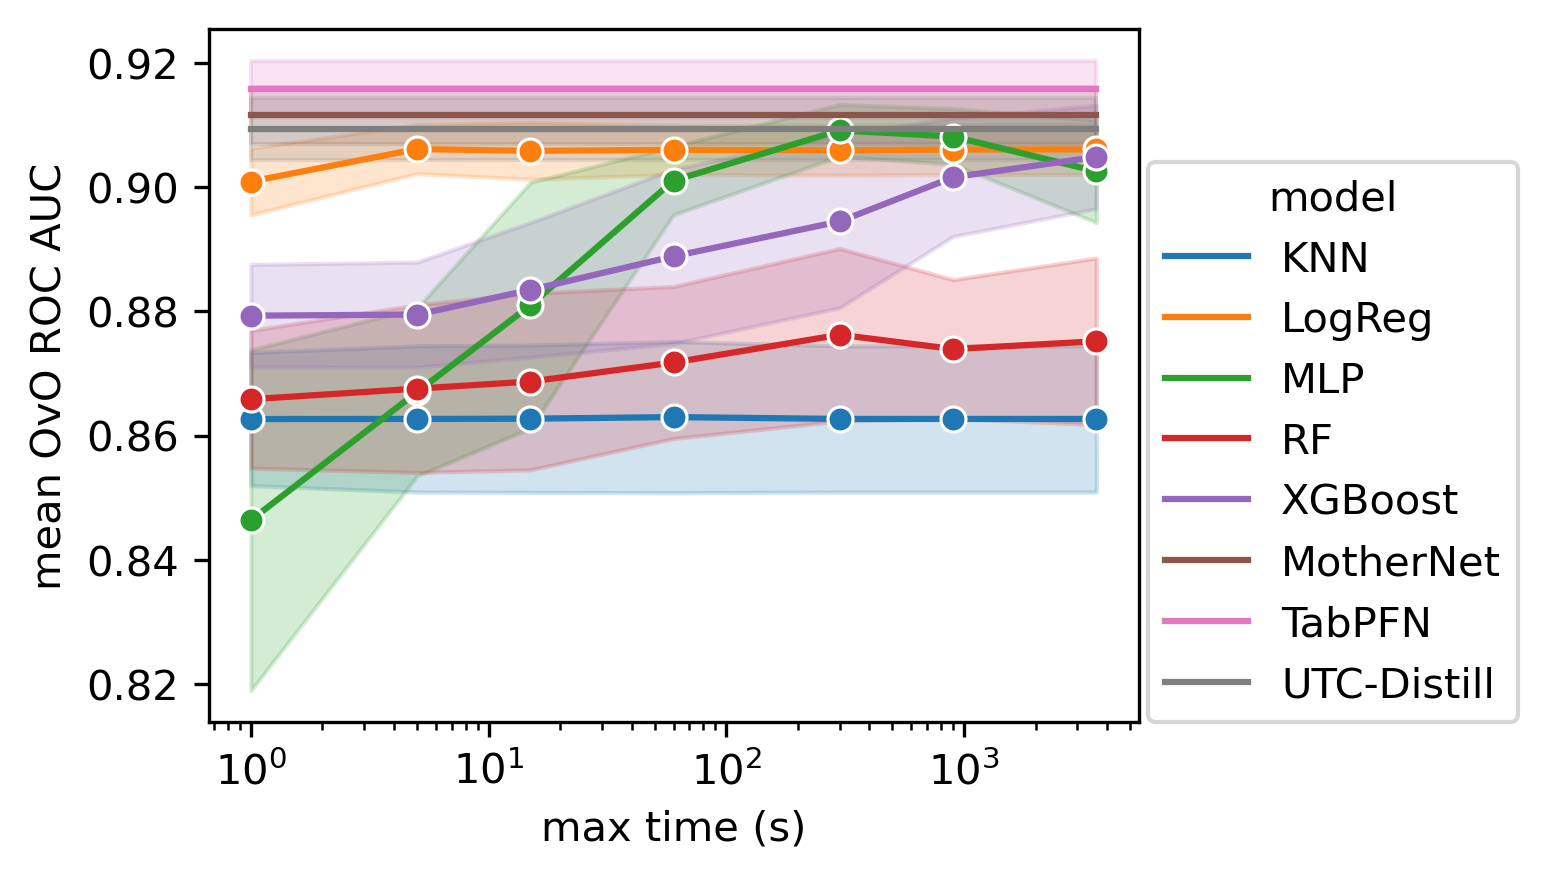

In [262]:
compare_splits = results_combined_small_data.groupby(["model", "split", "max_time"])['mean_metric'].mean().reset_index()

import seaborn as sns
plt.figure(figsize=(4, 3), dpi=300)
varies_over_time = ['LogReg', 'XGBoost', 'RF', 'KNN', 'MLP']
compare_splits_varies = compare_splits[compare_splits.model.isin(varies_over_time)]
compare_splits_fixed = compare_splits[~compare_splits.model.isin(varies_over_time)]

color_palette = sns.color_palette()
ax = sns.lineplot(compare_splits_varies, x="max_time", y="mean_metric", hue="model", errorbar="sd", marker="o", palette=color_palette[:len(varies_over_time)])

compare_splits_fixed_dummy = compare_splits_fixed.copy()
compare_splits_fixed_dummy['max_time'] = compare_splits_varies.max_time.max()
sns.lineplot(pd.concat([compare_splits_fixed, compare_splits_fixed_dummy]),
             x="max_time", y="mean_metric", hue="model", errorbar="sd", ax=ax, palette=color_palette[len(varies_over_time):compare_splits.model.nunique()])
sns.move_legend(ax, (1.01, 0))
ax.set_ylabel("mean OvO ROC AUC")
ax.set_xlabel("max time (s)")
ax.set_xscale("log")
#ax.set_ylim(0.9, 0.95)
# ax.get_legend().remove()
plt.savefig("mean_auc_over_time_test_numeric_small_no_legend_mlp_big_font.pdf", bbox_inches="tight")

<Axes: xlabel='max time (s)', ylabel='mean OvO ROC AUC'>

<Axes: xlabel='max time (s)', ylabel='mean OvO ROC AUC'>

<Figure size 640x480 with 0 Axes>